<a href="https://colab.research.google.com/github/rizkyfransisca/Tugas-Akhir-Associate-Data-Scientist_credit-card-acceptance-classification/blob/main/CreditCardAcceptanceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Eksplorasi Data & Persiapan Data

Melakukan ekplorasi data dan persiapan data untuk mengklasifikasi kelayakan penerimaan kartu kredit berdasarkan profil dari
nasabah bank

<br>Kelompok 1
<br>ITB-01
<br>Anggota:
  - Whinar Kukuh Rizky Ardana
  - Kadek Rizky Fransisca Putra
  - Maulana Farrel Ceskicevas


##Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# plt.style.use('default')
sns.set_theme()

## Eksplorasi data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/rizkyfransisca/Tugas-Akhir-Associate-Data-Scientist_credit-card-acceptance-classification/main/creditcardmarketing-bbm.csv")

Menampilkan 5 data pertama dari DataFrame

In [ ]:
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


Menampilkan 5 data terakhir dari DataFrame

In [ ]:
df.tail()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0
17999,18000,No,Cash Back,Letter,Low,2,No,Medium,2,1,3,No,1056.00,265.0,1378.0,1978.0,603.0


Menampilkan 5 sample data yang dipilih secara acak dari DataFrame

In [ ]:
df.sample(5)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
1126,1127,No,Points,Postcard,Medium,1,No,High,2,1,2,No,1062.50,1717.0,1310.0,880.0,343.0
9989,9990,No,Cash Back,Postcard,Medium,1,No,Medium,2,1,5,Yes,1109.00,454.0,1085.0,1798.0,1099.0
11846,11847,No,Air Miles,Postcard,Medium,1,No,Low,1,1,4,Yes,708.75,549.0,664.0,887.0,735.0
7927,7928,No,Air Miles,Postcard,High,1,No,Low,1,1,4,No,136.75,140.0,143.0,196.0,68.0
862,863,No,Cash Back,Postcard,Medium,1,Yes,Low,2,1,4,Yes,945.00,188.0,676.0,1283.0,1633.0


Menampilkan nilai atau value yang ada pada setiap feature, untuk semua feature yang ada pada DataFrame

In [ ]:
for col in df.columns:
  print('-'*30 + " " + col +  " " +  '-'*30)
  print()
  print(df[col].unique())
  print()

------------------------------ Customer Number ------------------------------

[    1     2     3 ... 17998 17999 18000]

------------------------------ Offer Accepted ------------------------------

['No' 'Yes']

------------------------------ Reward ------------------------------

['Air Miles' 'Cash Back' 'Points']

------------------------------ Mailer Type ------------------------------

['Letter' 'Postcard']

------------------------------ Income Level ------------------------------

['High' 'Medium' 'Low']

------------------------------ # Bank Accounts Open ------------------------------

[1 2 3]

------------------------------ Overdraft Protection ------------------------------

['No' 'Yes']

------------------------------ Credit Rating ------------------------------

['High' 'Medium' 'Low']

------------------------------ # Credit Cards Held ------------------------------

[2 1 3 4]

------------------------------ # Homes Owned ------------------------------

[1 2 3]

--------

Menampilkan missing value yang ada pada setiap kolom, untuk semua kolom yang ada pada DataFrame.

In [ ]:
df.isna().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [ ]:
avg = df[df['Average Balance'].isna()].index
q1 = df[df['Q1 Balance'].isna()].index
q2 = df[df['Q2 Balance'].isna()].index
q3 = df[df['Q3 Balance'].isna()].index
q4 = df[df['Q4 Balance'].isna()].index

pd.DataFrame({
    'avg':avg,
    'q1':q1,
    'q2':q2,
    'q3':q3,
    'q4':q4
}).duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
dtype: bool

Pada data ini, ditemukan Missing value sebanyak 24 data, dan missing value ini hanya muncul pada kolom balance, dan muncul di baris yang sama. sehingga pada kasus ini missing value akan kita hapus karena setiap kolom mempunyai missing value pada baris yang sama. 

Text(0.5, 1.0, 'Proportions of Accepted Offer Customers')

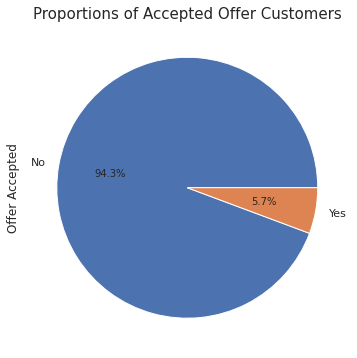

In [ ]:
plt.figure(figsize=(8,6))
df['Offer Accepted'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f%%")
plt.title('Proportions of Accepted Offer Customers', fontsize=15)

Dari pie chart diatas, ditemukan bahwa dataset ini memiliki label yang tidak seimbang, hampir semua penawaran atau offer tidak diterima, dan penawaran atau offer yang diterima hanya 5,7% dari data.

Menampilkan nilai statistika deskriptif untuk setiap kolom yang memiliki tipe data numerik.

In [ ]:
df.describe()

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


Melakukan pengecekan outliers pada kolom "Average Balance", "Q1 Balance", "Q2 Balance", "Q3 Balance", dan "Q4 Balance" menggunakan boxplot

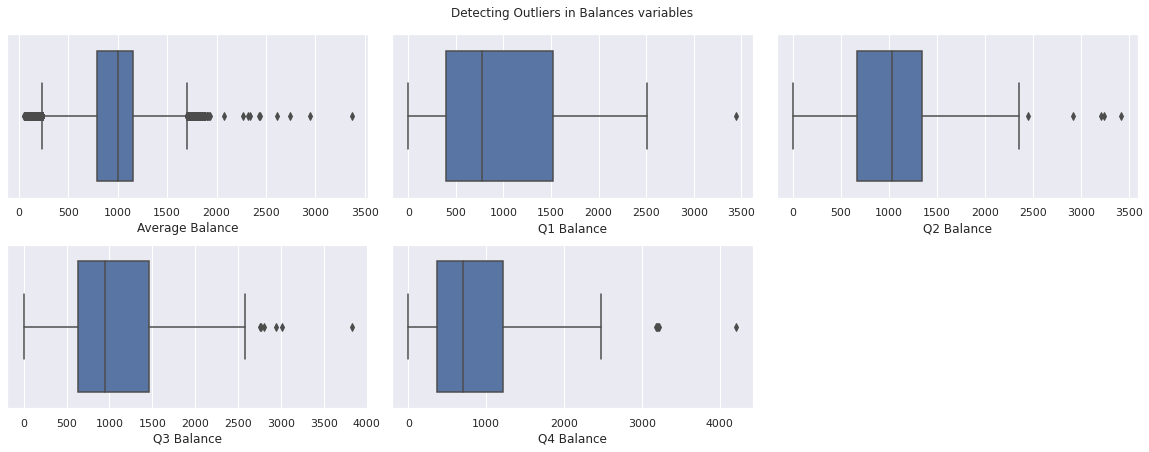

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(16,6))
sns.boxplot(df['Average Balance'], ax=ax[0,0])
sns.boxplot(df['Q1 Balance'], ax=ax[0,1])
sns.boxplot(df['Q2 Balance'], ax=ax[0,2])
sns.boxplot(df['Q3 Balance'], ax=ax[1,0])
sns.boxplot(df['Q4 Balance'], ax=ax[1,1])
ax[1][2].set_visible(False)

plt.suptitle('Detecting Outliers in Balances variables', y=1.04)

plt.tight_layout()

Dengan menggunakan Boxplot, terdapat outliers/data pencilan pada kolom balance (Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance). data pencilan terbanyak ada pada kolom Average Balance yang muncul di atas dan bawah treshold,

Melakukan pengecekan, apakah setiap nilai pada kolom "Custumer Number" merupakan nilai yang unik.

In [ ]:
df['Customer Number'].is_unique

True

Karena kolom "Customer Number" menghasilkan atau mempunyai nilai yang unik, maka kami menggunakan nilai pada kolom "Customer Number" sebagai indeks

In [ ]:
df = df.set_index('Customer Number')
df.head()

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
Customer Number,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


Mengecek dan menampilkan duplicated data yang ada pada DataFrame

In [ ]:
df.duplicated().sum()

0

## Data Preprocessing

### Handling Missing Value

Dalam menghandle missing value yang ditemukan pada dataset, kami men-drop atau membuang baris yang terdapat missing value. Kami menggunakan metode tersebut karena semua missing value yang ditemukan pada kolom "Average Balance", "Q1 Balance", "Q2 Balance", "Q3 Balance", dan "Q4 Balance" berada pada baris yang sama.

In [ ]:
print('Dimensi data awal : ',df.shape)

df.dropna(inplace=True)

print('Dimensi data setelah handling missing value : ',df.shape)

Dimensi data awal :  (18000, 16)
Dimensi data setelah handling missing value :  (17976, 16)


### Handling Outliers

Menampilkan 5 data pertama dari DataFrame

In [ ]:
df.head()

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
Customer Number,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


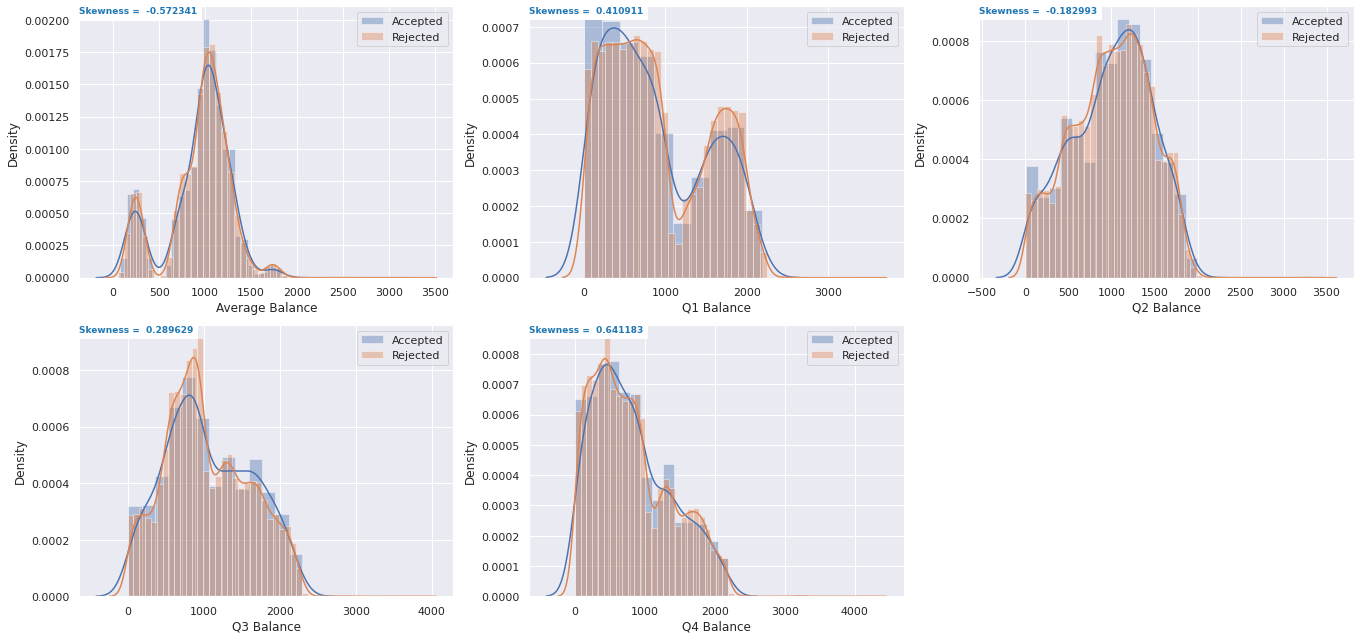

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(19,9))
df_acc = df[df['Offer Accepted'] == 'Yes']
df_reject = df[df['Offer Accepted'] == 'No']


sns.distplot(df_acc['Average Balance'], ax=ax[0,0], label='Accepted')
sns.distplot(df_reject['Average Balance'], ax=ax[0,0], label='Rejected')
ax[0,0].legend()
ax[0,0].text(x=0, y=1, transform=ax[0,0].transAxes, s="Skewness =  %f" % df['Average Balance'].skew(), fontweight=600,fontsize=9, verticalalignment='top',horizontalalignment='left', backgroundcolor='white',color='tab:blue')


sns.distplot(df_acc['Q1 Balance'], ax=ax[0,1], label='Accepted')
sns.distplot(df_reject['Q1 Balance'], ax=ax[0,1], label='Rejected')
ax[0,1].legend()
ax[0,1].text(x=0, y=1, transform=ax[0,1].transAxes, s="Skewness =  %f" % df['Q1 Balance'].skew(), fontweight=600,fontsize=9, verticalalignment='top',horizontalalignment='left', backgroundcolor='white',color='tab:blue')

sns.distplot(df_acc['Q2 Balance'], ax=ax[0,2], label='Accepted')
sns.distplot(df_reject['Q2 Balance'], ax=ax[0,2], label='Rejected')
ax[0,2].legend()
ax[0,2].text(x=0, y=1, transform=ax[0,2].transAxes, s="Skewness =  %f" % df['Q2 Balance'].skew(), fontweight=600,fontsize=9, verticalalignment='top',horizontalalignment='left', backgroundcolor='white',color='tab:blue')


sns.distplot(df_acc['Q3 Balance'], ax=ax[1,0], label='Accepted')
sns.distplot(df_reject['Q3 Balance'], ax=ax[1,0], label='Rejected')
ax[1,0].legend()
ax[1,0].text(x=0, y=1, transform=ax[1,0].transAxes, s="Skewness =  %f" % df['Q3 Balance'].skew(), fontweight=600,fontsize=9, verticalalignment='top',horizontalalignment='left', backgroundcolor='white',color='tab:blue')


sns.distplot(df_acc['Q4 Balance'], ax=ax[1,1], label='Accepted')
sns.distplot(df_reject['Q4 Balance'], ax=ax[1,1], label='Rejected')
ax[1,1].legend()
ax[1,1].text(x=0, y=1, transform=ax[1,1].transAxes, s="Skewness =  %f" % df['Q4 Balance'].skew(), fontweight=600,fontsize=9, verticalalignment='top',horizontalalignment='left', backgroundcolor='white',color='tab:blue')


ax[1][2].set_visible(False)


plt.tight_layout()

Kami memeriksa distribusi dari setiap kolom balance, tidak terdapat kolom yang sepenuhnya berdistribusi normal. terutama kolom Q4 Balance yang cenderung miring ke kanan dengan nilai skewness 0.6

Kami melakukan treatment atau penghilangan nilai outliers dengan cara mengubah nilai outliers yang ditemukan pada kolom "Average Balance", "Q1 Balance", "Q2 Balance", "Q3 Balance", dan "Q4 Balance" dengan nilai batas maksimum observasi dan nilai batas minimum observasi pada setiap kolom. Kami menggunakan metode tersebut karena outliers pada kolom "Average Balance", "Q1 Balance", "Q2 Balance", "Q3 Balance", dan "Q4 Balance" merupakan data yang valid atau tidak berasal dari kesalahan input atau human error

In [ ]:
outliers_columns = ["Average Balance", "Q1 Balance", "Q2 Balance", "Q3 Balance", "Q4 Balance"]
for column in outliers_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  df.loc[df[column] < (Q1 - 1.5 * IQR), column] = Q1 - 1.5 * IQR
  df.loc[df[column] > (Q3 + 1.5 * IQR), column] = Q3 + 1.5 * IQR

Melakukan pengecekan ulang nilai outliers pada kolom "Average Balance", "Q1 Balance", "Q2 Balance", "Q3 Balance", dan "Q4 Balance" setelah dilakukan treatment outliers atau penghapusan nilai outliers.

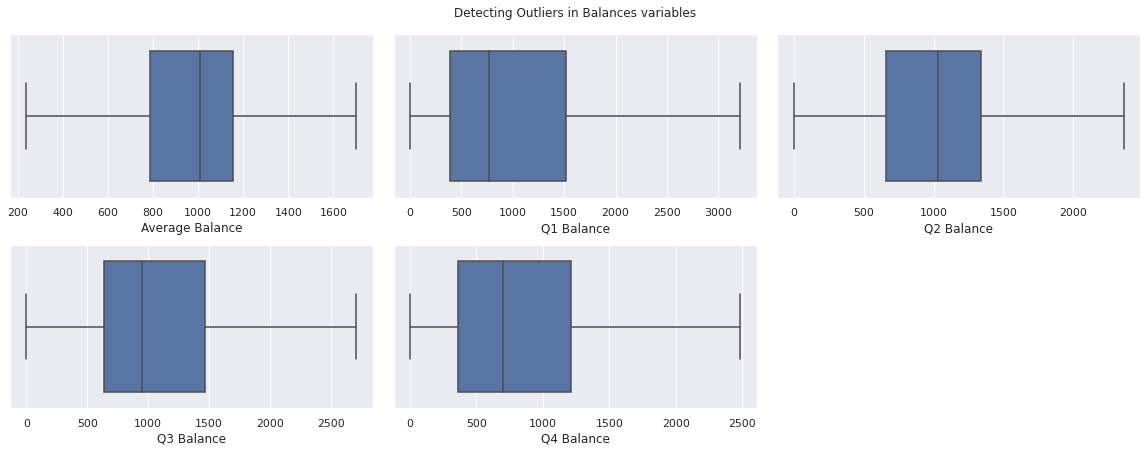

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(16,6))
sns.boxplot(df['Average Balance'], ax=ax[0,0])
sns.boxplot(df['Q1 Balance'], ax=ax[0,1])
sns.boxplot(df['Q2 Balance'], ax=ax[0,2])
sns.boxplot(df['Q3 Balance'], ax=ax[1,0])
sns.boxplot(df['Q4 Balance'], ax=ax[1,1])
ax[1][2].set_visible(False)

plt.suptitle('Detecting Outliers in Balances variables', y=1.04)

plt.tight_layout()

### Encoding Categorical Variables

In [ ]:
def level_encoder(data):
    if data == 'High':
        return 2
    if data == 'Medium':
        return 1
    else:
        return 0

df['Income Level'] = df['Income Level'].apply(lambda x : level_encoder(x) )
df['Credit Rating'] = df['Credit Rating'].apply(lambda x : level_encoder(x) )

Pada tahap ini kami akan melakukan encoding ordinal data pada kolom Income Level dan Credit Rating, encoding dilakukan sesuai tingkatan data pada kolom tersebut.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Offer Accepted'] = le.fit_transform(df['Offer Accepted'])
df['Offer Accepted'].value_counts(normalize=True)

0    0.943202
1    0.056798
Name: Offer Accepted, dtype: float64

Pada tahap ini kami melakukan encoding untuk label / data target karena masih  berbentuk kategorikal data

In [ ]:
%pip install feature-engine
from feature_engine.encoding import OneHotEncoder

     |████████████████████████████████| 180 kB 7.8 MB/s 
     |████████████████████████████████| 9.8 MB 18.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
enc = OneHotEncoder()
df = enc.fit_transform(df)

df.head()

,Offer Accepted,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer Type_Letter,Mailer Type_Postcard,Overdraft Protection_No,Overdraft Protection_Yes,Own Your Home_No,Own Your Home_Yes
Customer Number,,,,,,,,,,,,,,,,,,,,,
1,0,2,1,2,2,1,4,1160.750,1669.0,877.0,1095.0,1002.0,1,0,0,1,0,1,0,1,0
2,0,1,1,1,2,2,5,238.875,39.0,106.0,78.0,366.0,1,0,0,1,0,1,0,0,1
3,0,2,2,1,2,1,2,276.500,367.0,352.0,145.0,242.0,1,0,0,0,1,1,0,0,1
4,0,1,2,2,1,1,4,1219.000,1578.0,1760.0,1119.0,419.0,1,0,0,1,0,1,0,1,0
5,0,1,1,1,2,1,6,1211.000,2140.0,1357.0,982.0,365.0,1,0,0,1,0,1,0,0,1


Kemudian di tahap ini kami melakukan encoding untuk data kategorikal yang berjenis nominal menggunakan fungsi OneHotEncoder.

### Scaling

Menampilkan 5 data pertama dari DataFrame

In [ ]:
df.head()

,Offer Accepted,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer Type_Letter,Mailer Type_Postcard,Overdraft Protection_No,Overdraft Protection_Yes,Own Your Home_No,Own Your Home_Yes
Customer Number,,,,,,,,,,,,,,,,,,,,,
1,0,2,1,2,2,1,4,1160.750,1669.0,877.0,1095.0,1002.0,1,0,0,1,0,1,0,1,0
2,0,1,1,1,2,2,5,238.875,39.0,106.0,78.0,366.0,1,0,0,1,0,1,0,0,1
3,0,2,2,1,2,1,2,276.500,367.0,352.0,145.0,242.0,1,0,0,0,1,1,0,0,1
4,0,1,2,2,1,1,4,1219.000,1578.0,1760.0,1119.0,419.0,1,0,0,1,0,1,0,1,0
5,0,1,1,1,2,1,6,1211.000,2140.0,1357.0,982.0,365.0,1,0,0,1,0,1,0,0,1


In [ ]:
df_copy = df.copy()

In [ ]:
X = df.drop(columns='Offer Accepted', axis=1)
y = df['Offer Accepted']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

Sebelum dilakukan standardisasi, data harus di split terlebih dahulu menjadi Train dan Test data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns= X_train.columns[:11].values

scaler.fit(X_train[columns])

X_train[columns] = scaler.transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

Untuk Standardisasi, kami menggunakan MinMaxScaler karena data yang kita gunakan tidak sepenuhnya berdistribusi normal. kemudian fungsi scaler kita fit ke data train, kemudian kita transormasikan scaler ke data train dan juga test agar data test juga di transformasi sesuai dengan range data train.

In [ ]:
X_train.head()

,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer Type_Letter,Mailer Type_Postcard,Overdraft Protection_No,Overdraft Protection_Yes,Own Your Home_No,Own Your Home_Yes
Customer Number,,,,,,,,,,,,,,,,,,,,
17575,0.5,0.0,0.5,0.666667,0.0,0.125,0.332792,0.179251,0.336088,0.229321,0.366928,1,0,0,0,1,1,0,1,0
5688,0.5,0.5,1.0,0.333333,0.0,0.250,0.427461,0.030498,0.178004,0.548375,0.584591,0,1,0,0,1,1,0,0,1
8684,1.0,0.0,0.5,0.000000,1.0,0.125,0.488978,0.485160,0.445857,0.358567,0.094146,0,0,1,1,0,1,0,1,0
5228,0.5,0.0,0.0,0.666667,0.0,0.250,0.372095,0.252383,0.257258,0.274742,0.390264,1,0,0,0,1,1,0,1,0
11688,0.5,0.5,0.0,0.000000,0.0,0.250,0.521104,0.515968,0.619623,0.159897,0.181452,0,0,1,1,0,1,0,0,1


Data sudah di transformasi

### Handling Imbalance Data

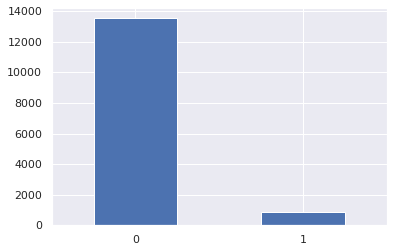

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

Data yang kita gunakan memiliki label yang tidak imbang, dimana jika dilihat dari bar chart diatas perbandingan kelas sangat jauh. sehingga perlu di seimbangkan jumlahnya agar data tidak cenderung berat di salah satu kelas saja.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

Untuk mengatasi imbalance class, kami menggunakan fungsi SMOTE untuk melakukan upsampling.

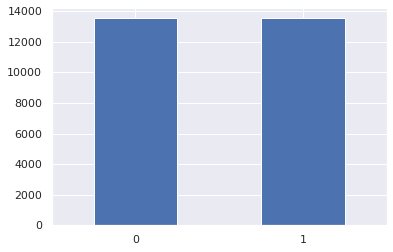

In [ ]:
y_smote.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

Setelah dilakukan upsampling, jumlah data class sudah sama sehingga sudah siap untuk dilakukan modelling.

## Modelling

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [ ]:
X_train.columns

Index(['Income Level', '# Bank Accounts Open', 'Credit Rating',
       '# Credit Cards Held', '# Homes Owned', 'Household Size',
       'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance',
       'Q4 Balance', 'Reward_Air Miles', 'Reward_Cash Back', 'Reward_Points',
       'Mailer Type_Letter', 'Mailer Type_Postcard', 'Overdraft Protection_No',
       'Overdraft Protection_Yes', 'Own Your Home_No', 'Own Your Home_Yes'],
      dtype='object')

### **K-NN MODEL**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)
y_proba_knn = model_knn.predict_proba(X_test)[:,1]

print('KNN : ', accuracy_score(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))
print('precision', precision_score(y_test,y_pred_knn))
print('recall', recall_score(y_test,y_pred_knn))
print('f1_score', f1_score(y_test,y_pred_knn))
print('Roc_AUC', roc_auc_score(y_test,y_proba_knn))

KNN :  0.9441045606229144
[[3393   24]
 [ 177    2]]
precision 0.07692307692307693
recall 0.0111731843575419
f1_score 0.01951219512195122
Roc_AUC 0.5841536648011995


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn_smote = KNeighborsClassifier()
model_knn_smote.fit(X_smote, y_smote)


y_pred_knn_smote = model_knn_smote.predict(X_test)
y_proba_knn_smote = model_knn_smote.predict_proba(X_test)[:,1]

print('KNN : ', accuracy_score(y_test,y_pred_knn_smote))
print(confusion_matrix(y_test,y_pred_knn_smote))
print('precision', precision_score(y_test,y_pred_knn_smote))
print('recall', recall_score(y_test,y_pred_knn_smote))
print('f1_score', f1_score(y_test,y_pred_knn_smote))
print('Roc_AUC', roc_auc_score(y_test,y_proba_knn_smote))

KNN :  0.771134593993326
[[2714  703]
 [ 120   59]]
precision 0.07742782152230972
recall 0.329608938547486
f1_score 0.12539851222104145
Roc_AUC 0.6080687590637022


### **Naive Bayes**

In [ ]:
from sklearn import naive_bayes
from sklearn import metrics

model_nb = naive_bayes.BernoulliNB()
model_nb.fit(X_train, y_train)

y_pred_nb = model_nb.predict(X_test)
y_proba_nb = model_nb.predict_proba(X_test)[:,1]

print('Naive Bayes : ', accuracy_score(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))
print('precision', precision_score(y_test,y_pred_nb))
print('recall', recall_score(y_test,y_pred_nb))
print('f1_score', f1_score(y_test,y_pred_nb))
print('Roc_AUC', roc_auc_score(y_test,y_proba_nb))

Naive Bayes :  0.9502224694104561
[[3417    0]
 [ 179    0]]
precision 0.0
recall 0.0
f1_score 0.0
Roc_AUC 0.7415175192064652


In [ ]:
from sklearn import naive_bayes
from sklearn import metrics

model_nb_smote = naive_bayes.BernoulliNB()
model_nb_smote.fit(X_smote, y_smote)

y_pred_nb_smote = model_nb_smote.predict(X_test)
y_proba_nb_smote = model_nb_smote.predict_proba(X_test)[:,1]

print('Naive Bayes : ', accuracy_score(y_test,y_pred_nb_smote))
print(confusion_matrix(y_test,y_pred_nb_smote))
print('precision', precision_score(y_test,y_pred_nb_smote))
print('recall', recall_score(y_test,y_pred_nb_smote))
print('f1_score', f1_score(y_test,y_pred_nb_smote))
print('Roc_AUC', roc_auc_score(y_test,y_proba_nb_smote))

Naive Bayes :  0.6387652947719689
[[2180 1237]
 [  62  117]]
precision 0.086410635155096
recall 0.6536312849162011
f1_score 0.15264187866927595
Roc_AUC 0.6858674095836951


### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
y_proba_lr = model_lr.predict_proba(X_test)[:,1]

print('Logistic Regression : ', accuracy_score(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))
print('precision', precision_score(y_test,y_pred_lr))
print('recall', recall_score(y_test,y_pred_lr))
print('f1_score', f1_score(y_test,y_pred_lr))
print('Roc_AUC', roc_auc_score(y_test,y_proba_lr))

Logistic Regression :  0.9502224694104561
[[3417    0]
 [ 179    0]]
precision 0.0
recall 0.0
f1_score 0.0
Roc_AUC 0.7629303368141219


In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr_smote = LogisticRegression()
model_lr_smote.fit(X_smote, y_smote)

y_pred_lr_smote = model_lr_smote.predict(X_test)
y_proba_lr_smote = model_lr_smote.predict_proba(X_test)[:,1]

print('Logistic Regression : ', accuracy_score(y_test,y_pred_lr_smote))
print(confusion_matrix(y_test,y_pred_lr_smote))
print('precision', precision_score(y_test,y_pred_lr_smote))
print('recall', recall_score(y_test,y_pred_lr_smote))
print('f1_score', f1_score(y_test,y_pred_lr_smote))
print('Roc_AUC', roc_auc_score(y_test,y_proba_lr_smote))

Logistic Regression :  0.6879866518353727
[[2354 1063]
 [  59  120]]
precision 0.1014370245139476
recall 0.6703910614525139
f1_score 0.1762114537444934
Roc_AUC 0.7595639940291967


### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)
y_proba_dt = model_dt.predict_proba(X_test)[:,1]

print('Decision Tree : ', accuracy_score(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))
print('precision', precision_score(y_test,y_pred_dt))
print('recall', recall_score(y_test,y_pred_dt))
print('f1_score', f1_score(y_test,y_pred_dt))
print('Roc_AUC', roc_auc_score(y_test,y_proba_dt))

Decision Tree :  0.8993325917686318
[[3209  208]
 [ 154   25]]
precision 0.1072961373390558
recall 0.13966480446927373
f1_score 0.12135922330097088
Roc_AUC 0.5393963472156142


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt_smote = DecisionTreeClassifier()
model_dt_smote.fit(X_smote, y_smote)

y_pred_dt_smote = model_dt_smote.predict(X_test)
y_proba_dt_smote = model_dt_smote.predict_proba(X_test)[:,1]

print('Decision Tree : ', accuracy_score(y_test,y_pred_dt_smote))
print(confusion_matrix(y_test,y_pred_dt_smote))
print('precision', precision_score(y_test,y_pred_dt_smote))
print('recall', recall_score(y_test,y_pred_dt_smote))
print('f1_score', f1_score(y_test,y_pred_dt_smote))
print('Roc_AUC', roc_auc_score(y_test,y_proba_dt_smote))

Decision Tree :  0.8887652947719689
[[3170  247]
 [ 153   26]]
precision 0.09523809523809523
recall 0.1452513966480447
f1_score 0.11504424778761062
Roc_AUC 0.5364828829889331


### **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

model_svm = SVC(probability=True)
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)
y_proba_svm = model_svm.predict_proba(X_test)[:,1]

print('Support Vector Machine : ', accuracy_score(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))
print('precision', precision_score(y_test,y_pred_svm))
print('recall', recall_score(y_test,y_pred_svm))
print('f1_score', f1_score(y_test,y_pred_svm))
print('Roc_AUC', roc_auc_score(y_test,y_proba_svm))

Support Vector Machine :  0.9502224694104561
[[3417    0]
 [ 179    0]]
precision 0.0
recall 0.0
f1_score 0.0
Roc_AUC 0.592067594985964


In [ ]:
from sklearn.svm import SVC

model_svm_smote = SVC(probability=True)
model_svm_smote.fit(X_smote, y_smote)

y_pred_svm_smote = model_svm_smote.predict(X_test)
y_proba_svm_smote = model_svm_smote.predict_proba(X_test)[:,1]

print('Support Vector Machine : ', accuracy_score(y_test,y_pred_svm_smote))
print(confusion_matrix(y_test,y_pred_svm_smote))
print('precision', precision_score(y_test,y_pred_svm_smote))
print('recall', recall_score(y_test,y_pred_svm_smote))
print('f1_score', f1_score(y_test,y_pred_svm_smote))
print('Roc_AUC', roc_auc_score(y_test,y_proba_svm_smote))

Support Vector Machine :  0.6960511679644049
[[2399 1018]
 [  75  104]]
precision 0.09269162210338681
recall 0.5810055865921788
f1_score 0.1598770176787087
Roc_AUC 0.6968035275479324


### **XGBoost**

In [ ]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

y_pred_xgb = model_xgb.predict(X_test)
y_proba_xgb = model_xgb.predict_proba(X_test)[:,1]

print('XGB : ', accuracy_score(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))
print('precision', precision_score(y_test,y_pred_xgb))
print('recall', recall_score(y_test,y_pred_xgb))
print('f1_score', f1_score(y_test,y_pred_xgb))
print('Roc_AUC', roc_auc_score(y_test,y_proba_xgb))

XGB :  0.9502224694104561
[[3417    0]
 [ 179    0]]
precision 0.0
recall 0.0
f1_score 0.0
Roc_AUC 0.7524356528236242


In [ ]:
from xgboost import XGBClassifier

model_xgb_smote = XGBClassifier()
model_xgb_smote.fit(X_smote,y_smote)

y_pred_xgb_smote = model_xgb_smote.predict(X_test)
y_proba_xgb_smote = model_xgb_smote.predict_proba(X_test)[:,1]

print('XGB : ', accuracy_score(y_test,y_pred_xgb_smote))
print(confusion_matrix(y_test,y_pred_xgb_smote))
print('precision', precision_score(y_test,y_pred_xgb_smote))
print('recall', recall_score(y_test,y_pred_xgb_smote))
print('f1_score', f1_score(y_test,y_pred_xgb_smote))
print('auc', roc_auc_score(y_test,y_proba_xgb_smote))

XGB :  0.9385428253615128
[[3358   59]
 [ 162   17]]
precision 0.2236842105263158
recall 0.09497206703910614
f1_score 0.13333333333333333
auc 0.7355818672003114


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_pred_rf = rfc.predict(X_test)
y_proba_rf = rfc.predict_proba(X_test)[:,1]

print('RandomForest : ', accuracy_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print('precision', precision_score(y_test,y_pred_rf))
print('recall', recall_score(y_test,y_pred_rf))
print('f1_score', f1_score(y_test,y_pred_rf))
print('auc', roc_auc_score(y_test,y_proba_rf))

RandomForest :  0.949666295884316
[[3415    2]
 [ 179    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3417
           1       0.00      0.00      0.00       179

    accuracy                           0.95      3596
   macro avg       0.48      0.50      0.49      3596
weighted avg       0.90      0.95      0.93      3596

precision 0.0
recall 0.0
f1_score 0.0
auc 0.6940960658423296


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_smote = RandomForestClassifier()
rfc_smote.fit(X_smote,y_smote)

y_pred_rf_smote = rfc_smote.predict(X_test)
y_proba_rf_smote = rfc_smote.predict_proba(X_test)[:,1]

print('RandomForest : ', accuracy_score(y_test,y_pred_rf_smote))
print(confusion_matrix(y_test,y_pred_rf_smote))
print(classification_report(y_test,y_pred_rf_smote))
print('precision', precision_score(y_test,y_pred_rf_smote))
print('recall', recall_score(y_test,y_pred_rf_smote))
print('f1_score', f1_score(y_test,y_pred_rf_smote))
print('auc', roc_auc_score(y_test,y_proba_rf_smote))

RandomForest :  0.9379866518353727
[[3365   52]
 [ 171    8]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3417
           1       0.13      0.04      0.07       179

    accuracy                           0.94      3596
   macro avg       0.54      0.51      0.52      3596
weighted avg       0.91      0.94      0.92      3596

precision 0.13333333333333333
recall 0.0446927374301676
f1_score 0.06694560669456066
auc 0.7008949665082409


### Result

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'Logistic Regression', 
              'Decision Tree', 'SVM', 'XGBOOST', 'Random Forest'],
    'Accuracy Score': [accuracy_score(y_test,y_pred_knn), accuracy_score(y_test,y_pred_nb), 
              accuracy_score(y_test,y_pred_lr), accuracy_score(y_test,y_pred_dt), accuracy_score(y_test,y_pred_svm), 
              accuracy_score(y_test,y_pred_xgb), accuracy_score(y_test,y_pred_rf)],
    'AUC Score' : [roc_auc_score(y_test,y_proba_knn), roc_auc_score(y_test,y_proba_nb), 
               roc_auc_score(y_test,y_proba_lr), roc_auc_score(y_test,y_proba_dt), roc_auc_score(y_test,y_proba_svm), 
              roc_auc_score(y_test,y_proba_xgb), roc_auc_score(y_test,y_proba_rf)],
    'Accuracy Score SMOTE': [accuracy_score(y_test,y_pred_knn_smote), accuracy_score(y_test,y_pred_nb_smote), 
              accuracy_score(y_test,y_pred_lr_smote), accuracy_score(y_test,y_pred_dt_smote), accuracy_score(y_test,y_pred_svm_smote), 
              accuracy_score(y_test,y_pred_xgb_smote), accuracy_score(y_test,y_pred_rf_smote)],
    'AUC Score SMOTE' : [roc_auc_score(y_test,y_proba_knn_smote), roc_auc_score(y_test,y_proba_nb_smote), 
               roc_auc_score(y_test,y_proba_lr_smote), roc_auc_score(y_test,y_proba_dt_smote), roc_auc_score(y_test,y_proba_svm_smote), 
              roc_auc_score(y_test,y_proba_xgb_smote), roc_auc_score(y_test,y_proba_rf_smote)]
    })
models

,Model,Accuracy Score,AUC Score,Accuracy Score SMOTE,AUC Score SMOTE
0,KNN,0.944105,0.584154,0.776140,0.600720
1,Naive Bayes,0.950222,0.741518,0.638765,0.685867
2,Logistic Regression,0.950222,0.762930,0.687987,0.759564
3,Decision Tree,0.899333,0.539396,0.888765,0.536483
4,SVM,0.950222,0.592068,0.696051,0.696804
5,XGBOOST,0.950222,0.752436,0.938543,0.735582
6,Random Forest,0.949666,0.694096,0.937987,0.700895


## Seleksi Fitur

### SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Memanggil functuin SelectKBest dengan score function chi2 dan k sebanyak 20

In [ ]:
bestfeature = SelectKBest(score_func=chi2, k=20)
fit = bestfeature.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolums = pd.DataFrame(X_train.columns)

In [ ]:
featureScores = pd.concat([dfcolums, dfscores],axis=1)
featureScores.columns = ['Field', 'Score']
print(featureScores.nlargest(20,'Score'))

                       Field       Score
2              Credit Rating  117.623677
14        Mailer Type_Letter   67.786526
15      Mailer Type_Postcard   65.780238
12          Reward_Cash Back   44.917344
11          Reward_Air Miles   43.210968
0               Income Level   20.647586
7                 Q1 Balance    0.449279
5             Household Size    0.164540
1       # Bank Accounts Open    0.115990
9                 Q3 Balance    0.111927
17  Overdraft Protection_Yes    0.082209
3        # Credit Cards Held    0.045535
4              # Homes Owned    0.022034
16   Overdraft Protection_No    0.014484
18          Own Your Home_No    0.011392
6            Average Balance    0.010187
19         Own Your Home_Yes    0.006280
10                Q4 Balance    0.005470
13             Reward_Points    0.004162
8                 Q2 Balance    0.000926


Setelah dilakukan SeleckKBest ditemukan bahwa Q1 Balance, Q3 Balance, Credit Rating, Mailer Type_Letter, Mailer Type_Postcard, Reward_Cash Back, Income Level, Reward_Air Miles, dan Average Balance mendapatkan nilai yang cukup tinggi sebagai atribut/fitur untuk target kelas Offer Accepted  

### Modelling Setelah Feature Selection

In [ ]:
# After Select K-Best

X = df_copy[['Credit Rating','Mailer Type_Letter','Mailer Type_Postcard','Reward_Cash Back','Reward_Air Miles']]
y = df['Offer Accepted']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns= X_train.columns[:11].values

scaler.fit(X_train[columns])

X_train[columns] = scaler.transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

#### **XGBoost**

In [ ]:
from xgboost import XGBClassifier

model_xgb_kb = XGBClassifier()
model_xgb_kb.fit(X_smote,y_smote)

y_pred_xgb_kb = model_xgb_kb.predict(X_test)
y_proba_xgb_kb = model_xgb_kb.predict_proba(X_test)[:,1]

print('XGB : ', accuracy_score(y_test,y_pred_xgb_kb))
print(confusion_matrix(y_test,y_pred_xgb_kb))
print('precision', precision_score(y_test,y_pred_xgb_kb))
print('recall', recall_score(y_test,y_pred_xgb_kb))
print('f1_score', f1_score(y_test,y_pred_xgb_kb))
print('auc', roc_auc_score(y_test,y_proba_xgb_kb))

XGB :  0.6398776418242491
[[2171 1246]
 [  49  130]]
precision 0.09447674418604651
recall 0.7262569832402235
f1_score 0.16720257234726688
auc 0.7388255894369755


In [ ]:
from xgboost import XGBClassifier

model_xgb_smote_kb = XGBClassifier()
model_xgb_smote_kb.fit(X_smote,y_smote)

y_pred_xgb_smote_kb = model_xgb_smote_kb.predict(X_test)
y_proba_xgb_smote_kb = model_xgb_smote_kb.predict_proba(X_test)[:,1]

print('XGB : ', accuracy_score(y_test,y_pred_xgb_smote_kb))
print(confusion_matrix(y_test,y_pred_xgb_smote_kb))
print('precision', precision_score(y_test,y_pred_xgb_smote_kb))
print('recall', recall_score(y_test,y_pred_xgb_smote_kb))
print('f1_score', f1_score(y_test,y_pred_xgb_smote_kb))
print('auc', roc_auc_score(y_test,y_proba_xgb_smote_kb))

XGB :  0.6398776418242491
[[2171 1246]
 [  49  130]]
precision 0.09447674418604651
recall 0.7262569832402235
f1_score 0.16720257234726688
auc 0.7388255894369755


#### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_kb = RandomForestClassifier()
rfc_kb.fit(X_train,y_train)

y_pred_rfc_kb = rfc_kb.predict(X_test)
y_proba_rfc_kb = rfc_kb.predict_proba(X_test)[:,1]

print('RandomForest : ', accuracy_score(y_test,y_pred_rfc_kb))
print(confusion_matrix(y_test,y_pred_rfc_kb))
print(classification_report(y_test,y_pred_rfc_kb))
print('precision', precision_score(y_test,y_pred_rfc_kb))
print('recall', recall_score(y_test,y_pred_rfc_kb))
print('f1_score', f1_score(y_test,y_pred_rfc_kb))
print('auc', roc_auc_score(y_test,y_proba_rfc_kb))

RandomForest :  0.9502224694104561
[[3417    0]
 [ 179    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3417
           1       0.00      0.00      0.00       179

    accuracy                           0.95      3596
   macro avg       0.48      0.50      0.49      3596
weighted avg       0.90      0.95      0.93      3596

precision 0.0
recall 0.0
f1_score 0.0
auc 0.7388255894369755


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_smote_kb = RandomForestClassifier()
rfc_smote_kb.fit(X_smote,y_smote)

y_pred_rfc_smote_kb = rfc_smote_kb.predict(X_test)
y_proba_rfc_smote_kb = rfc_smote_kb.predict_proba(X_test)[:,1]

print('RandomForest : ', accuracy_score(y_test,y_pred_rfc_smote_kb))
print(confusion_matrix(y_test,y_pred_rfc_smote_kb))
print(classification_report(y_test,y_pred_rfc_smote_kb))
print('precision', precision_score(y_test,y_pred_rfc_smote_kb))
print('recall', recall_score(y_test,y_pred_rfc_smote_kb))
print('f1_score', f1_score(y_test,y_pred_rfc_smote_kb))
print('auc', roc_auc_score(y_test,y_proba_rfc_smote_kb))

RandomForest :  0.5862068965517241
[[1972 1445]
 [  43  136]]
              precision    recall  f1-score   support

           0       0.98      0.58      0.73      3417
           1       0.09      0.76      0.15       179

    accuracy                           0.59      3596
   macro avg       0.53      0.67      0.44      3596
weighted avg       0.93      0.59      0.70      3596

precision 0.08602150537634409
recall 0.7597765363128491
f1_score 0.15454545454545457
auc 0.7388255894369755


### Result

In [ ]:
models = pd.DataFrame({
    'Model': ['XGBOOST', 'Random Forest'],
    'Accuracy Score': [accuracy_score(y_test,y_pred_xgb_kb), accuracy_score(y_test,y_pred_rfc_kb)],
    'AUC Score' : [roc_auc_score(y_test,y_proba_xgb_kb), roc_auc_score(y_test,y_proba_rfc_kb)],
    'Accuracy Score SMOTE': [accuracy_score(y_test,y_pred_xgb_smote_kb), accuracy_score(y_test,y_pred_rfc_smote_kb)],
    'AUC Score SMOTE' : [roc_auc_score(y_test,y_proba_xgb_smote_kb), roc_auc_score(y_test,y_proba_rfc_smote_kb)]
    })
models

,Model,Accuracy Score,AUC Score,Accuracy Score SMOTE,AUC Score SMOTE
0,XGBOOST,0.639878,0.738826,0.639878,0.738826
1,Random Forest,0.950222,0.738826,0.586207,0.738826


# Kesimpulan

Percobaan yang kami lakukan adalah menggunakan 7 algoritma berbeda, mulai dari algoritma KNN, Naive Bayes, Logistic Regression, Decision Tree, SVM, XGBOOST, dan Random Forest. Selain itu kami juga mencoba algoritma tersebut dengan 2 tipe data, data yang pertama adalah data yang belum di oversampling, sedangkan data yang kedua adalah data yang sudah dilakukan oversampling menggunakan metode SMOTE pada label. Selanjutnya kami juga melakukan percobaan dengan menguji 2 algoritma, yaitu algoritma XGBOOST dan Random Forest yang merupakan algoritma ensembled dengan menggunakan data yang sudah di filter menggunakan score SelectKBest yang melebihi 10. Dari semua percobaan diatas kami menyimpulkan bahwa algoritma XGBOOST menggunakan seluruh fitur awal dan data yang sudah dilakukan oversampling adalah model terbaik, dengan accuracy 0.9385428253615128 dan auc =  0.7345559419465277.

<br>Pada model ini kita juga memperhatikan nilai precision karena kita lebih menghindari kondisi FP (False Positif). dengan XGBoost memiliki nilai precision yang lebih tinggi dari pada model yang lainnya. selain itu nilai auc score nya juga lebih tinggi, menandakan bahwa model sudah cukup bisa membedakan data positif atau data negatif. kemungkinan nilai precision dan recall kecil karena data kami yang imbalance sehingga jumlah data positif sangat sedikit. kemungkinan jika nanti model mendapatkan data baru untuk dilatih, dapat menaikkan nilai metrics nya.